In [1]:
import os, sys

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import astropy.units as u
from astropy.time import Time
import astropy.coordinates as coord
from mpl_toolkits.mplot3d import Axes3D

!pip install twobody
from twobody import KeplerOrbit, Barycenter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 KB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for twobody: filename=twobody-0.8.3-cp39-cp39-linux_x86_64.whl size=470684 sha256=4be78c2128597b604c18e78e303c6ae678888a2b8634e439392102a10206a692
  Stored in directory: /root/.cache/pip/wheels/53/3a/d0/088d1fcc5138734ebd6dc7d85eb6883ee1707f7b29026648c2
Successfully built twobody


In [2]:
from google.colab import drive 
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Teaching/Resources/MyDemos')

Mounted at /content/drive


In [3]:
orb = KeplerOrbit(P=1.5*u.year, e=0,#.67,
                  omega=17.14*u.deg, i=65*u.deg, Omega=0*u.deg,
                  M0=35.824*u.deg, t0=Time('J2015.0'))

In [4]:
t = Time('2009-01-10') + np.linspace(0, 5, 1024) * u.year
unscaled_rv = orb.unscaled_radial_velocity(t)

Text(0, 0.5, 'unscaled radial velocity')

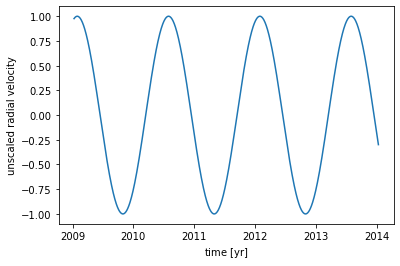

In [5]:
fig,ax = plt.subplots(1, 1) 
ax.plot(t.datetime, unscaled_rv, marker='') 
ax.set_xlabel('time [{0:latex_inline}]'.format(u.year)) 
ax.set_ylabel('unscaled radial velocity') 

Text(0, 0.5, 'radial velocity [$\\mathrm{km\\,s^{-1}}$]')

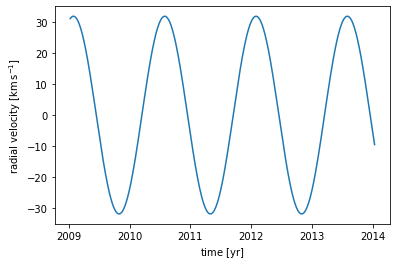

In [6]:
orb = KeplerOrbit(P=1.5*u.year, e=0, a=1.77*u.au,
                  omega=17.14*u.deg, i=65*u.deg, Omega=0*u.deg,
                  M0=35.824*u.deg, t0=Time('J2015.0'))
rv = orb.radial_velocity(t)

fig,ax = plt.subplots(1, 1) 
ax.plot(t.datetime, rv.to(u.km/u.s).value, marker='') 
ax.set_xlabel('time [{0:latex_inline}]'.format(u.year)) 
ax.set_ylabel('radial velocity [{0:latex_inline}]'.format(u.km/u.s)) 

Text(0, 0.5, 'radial velocity [$\\mathrm{km\\,s^{-1}}$]')

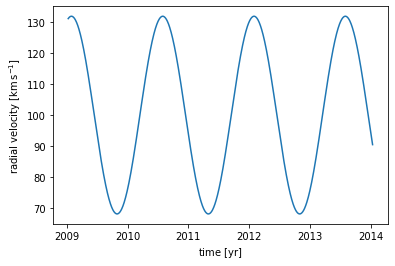

In [7]:
v0 = 100 * u.km/u.s
fig,ax = plt.subplots(1, 1) 
ax.plot(t.datetime, (rv + v0).to(u.km/u.s).value, marker='') 
ax.set_xlabel('time [{0:latex_inline}]'.format(u.year)) 
ax.set_ylabel('radial velocity [{0:latex_inline}]'.format(u.km/u.s)) 

In [8]:
from twobody import TwoBodyKeplerElements

In [9]:
t0=Time(2457148.9041,format="mjd")
bee_elem = TwoBodyKeplerElements(P=6.015742*u.day, 
                                 m1=0.3953*u.Msun, m2=0.2098*u.Msun, 
                                 omega=38*u.deg, i=88.87*u.deg, Omega=0*u.deg, t0=t0)

In [10]:
bee_elem

<TwoBodyKeplerElements [m1=0.40 solMass, m2=0.21 solMass, P=6.02 d, a=0.05 AU, e=0.00, ω=38.00 deg, i=88.87 deg, Ω=38.00 deg]>

In [11]:
bee1 = KeplerOrbit(bee_elem.get_body(1))
bee2 = KeplerOrbit(bee_elem.get_body(2))

In [12]:
t = Time('2015-01-10') + np.linspace(0, 12, 1024) * u.day
rv1 = bee1.radial_velocity(t)
rv2 = bee2.radial_velocity(t)


/usr/local/lib/python3.9/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.9/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


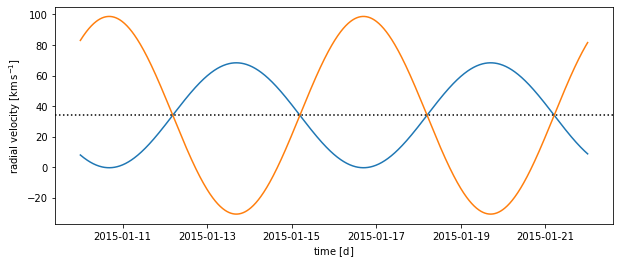

In [13]:
fig,ax = plt.subplots(1, 1, figsize=(10,4)) 
gamma = 34 * u.km/u.s

ax.plot(t.datetime, (rv1+gamma).to(u.km/u.s).value, marker='') 
ax.plot(t.datetime, (rv2+gamma).to(u.km/u.s).value, marker='') 
ax.set_xlabel('time [{0:latex_inline}]'.format(u.day)) 
ax.set_ylabel('radial velocity [{0:latex_inline}]'.format(u.km/u.s)) 

ax.axhline(gamma.value,color="k",linestyle=":")

In [14]:
t0=Time('J2000')
eq_elem = TwoBodyKeplerElements(P=6.015742*u.day, e=0.1,
                                 m1=0.5*u.Msun, m2=0.5*u.Msun, 
                                 omega=38*u.deg, i=88.87*u.deg, Omega=0*u.deg, t0=t0)

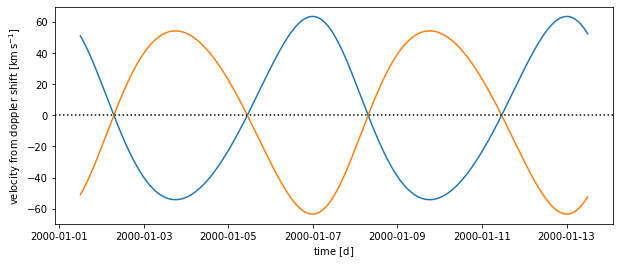

In [15]:
eq1 = KeplerOrbit(eq_elem.get_body(1))
eq2 = KeplerOrbit(eq_elem.get_body(2))
t = Time('J2000') + np.linspace(0, 12, 1024) * u.day
rv1 = eq1.radial_velocity(t)
rv2 = eq2.radial_velocity(t)
fig,ax = plt.subplots(1, 1, figsize=(10,4)) 
gamma = 0 * u.km/u.s

ax.plot(t.datetime, (rv1+gamma).to(u.km/u.s).value, marker='') 
ax.plot(t.datetime, (rv2+gamma).to(u.km/u.s).value, marker='') 
ax.set_xlabel('time [{0:latex_inline}]'.format(u.day)) 
ax.set_ylabel('velocity from doppler shift [{0:latex_inline}]'.format(u.km/u.s)) 

ax.axhline(gamma.value,color="k",linestyle=":")
# plt.savefig("eq_mass_binary.png",dpi=300,bbox_inches="tight")

In [16]:
origin = coord.ICRS(ra=14.745*u.deg, dec=71.512*u.deg,
                    distance=71.634*u.pc,
                    pm_ra_cosdec=32.123*u.mas/u.yr,
                    pm_dec=86.63*u.mas/u.yr,
                    radial_velocity=0*u.km/u.s)
b = Barycenter(origin=origin, t0=Time('J2000'))
xyz1 = eq1.orbital_plane(t)
XYZ1 = eq1.reference_plane(t).cartesian
xyz2 = eq2.orbital_plane(t)
XYZ2 = eq2.reference_plane(t).cartesian


        Use @ instead. [twobody.orbit]
        Use @ instead.
        Use @ instead. [twobody.orbit]
        Use @ instead.
        Use @ instead. [twobody.orbit]
        Use @ instead.


In [17]:
orbit_style1 = dict(marker='', linestyle='-', linewidth=2, color='C0')
orbit_style2 = dict(marker='', linestyle='-', linewidth=2, color='C1')
body_style = dict(marker='o', linestyle='none', color='C2',
                  markersize=12, zorder=100)
body_style = dict(marker='o', linestyle='none', color='C3',
                  markersize=12, zorder=100)
barycen_style = dict(marker='+', color='#888888', mew=2, ms=8)

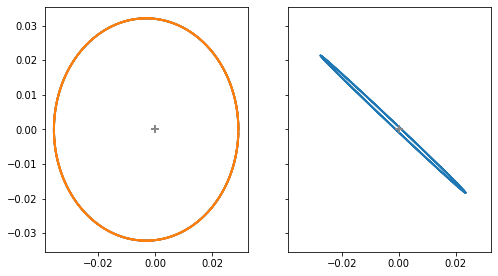

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(8,4.5),
                         sharex=True, sharey=True)

axes[0].plot(xyz1.x, xyz1.y, **orbit_style1)
axes[0].plot(xyz2.x, xyz2.y, **orbit_style2)
axes[0].plot(0, 0, **barycen_style)

axes[1].plot(XYZ1.x, XYZ1.y, **orbit_style1)
axes[1].plot(0, 0, **barycen_style)
